In [1]:
import geopandas as gpd
import plotly.express as px
import pandas as pd
import topojson as tp
import json

Axes(0.181337,0.11;0.662326x0.77)


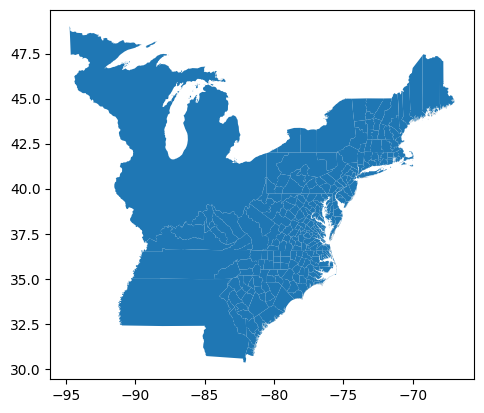

In [2]:
# import map shapefile
map_df = gpd.read_file("../data_raw/shapefiles/historicalcounties")

# rename columns and simplify map geometry (to make it run faster)
map_df.rename(columns = {'NHGISNAM':'county'}, inplace = True)
map_df.rename(columns = {'STATENAM':'state'}, inplace = True)
map_df["geometry"] = map_df["geometry"].simplify(0.01).buffer(0)

print(map_df.plot())

# save as a geojson
map_str = map_df.to_json()
map_gj = json.loads(map_str) # convert string json to dictionary json 

In [6]:
# get county populations 
county_pops = pd.read_csv("../data_raw/census_data/countyPopulation.csv", header=1)
county_pops = county_pops[county_pops["SE_T001_001"].notna()]
county_pops = county_pops.astype({"SE_T001_001":"int", "Geo_FIPS":"str"})
county_pops = county_pops[["Geo_FIPS", "SE_T001_001"]]
county_pops.rename(columns = {'SE_T001_001':'population'}, inplace = True)
county_pops

Geo_FIPS  population
0     900010       36290
1     900030       38149
2     900050       38635
3     900070       18828
4     900090       30703
..       ...         ...
287  5101890        1690
288  5101910        5625
289  5101930        7722
290  5101955        9210
291  5101990        5233

[284 rows x 2 columns]

In [8]:
# create choropleth map 
fig = px.choropleth(county_pops, geojson=map_gj, locations='Geo_FIPS', color='population',
                           color_continuous_scale="Viridis",
                           range_color=(county_pops["population"].min(), county_pops["population"].max()),
                            featureidkey="properties.Geo_FIPS",
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()